In [1]:
import pandas as pd
import dateutil
import numpy as np 

In [3]:
mbta = pd.read_csv('MBTA_Bus_Arrival_Departure_Times_2023/MBTA-Bus-Arrival-Departure-Times_2023-02.csv')

In [4]:
mbta

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67.0,maput,2.0,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72.0,cntsq,3.0,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75.0,mit,4.0,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79.0,hynes,5.0,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60697,2023-02-01,60,Outbound,58380612.0,19661.0,cnhlm,8.0,Endpoint,Schedule,1900-01-01T20:10:00Z,1900-01-01T20:16:35Z,NaN,NaN
60698,2023-02-01,60,Outbound,58376478.0,899.0,kenbs,1.0,Startpoint,Schedule,1900-01-01T20:15:00Z,1900-01-01T20:15:40Z,NaN,NaN
60699,2023-02-01,60,Outbound,58376478.0,1518.0,fnypk,2.0,Midpoint,Schedule,1900-01-01T20:17:00Z,1900-01-01T20:17:04Z,NaN,NaN
60700,2023-02-01,60,Outbound,58376478.0,1521.0,brlng,3.0,Midpoint,Schedule,1900-01-01T20:20:00Z,1900-01-01T20:24:03Z,NaN,NaN


In [5]:
bus1 = mbta.loc[mbta['route_id'] == '01']
bus1_day1 = bus1.loc[bus1['service_date'] == '2023-02-01'].loc[bus1['direction_id'] == "Inbound"]
bus1_day1

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67.0,maput,2.0,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72.0,cntsq,3.0,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75.0,mit,4.0,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79.0,hynes,5.0,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79.0,hynes,5.0,Midpoint,Headway,1900-01-02T01:20:00Z,1900-01-02T01:41:23Z,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187.0,masta,6.0,Midpoint,Headway,1900-01-02T01:22:00Z,1900-01-02T01:42:37Z,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59.0,Wasma,7.0,Midpoint,Headway,1900-01-02T01:24:00Z,1900-01-02T01:45:27Z,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62.0,Melwa,8.0,Midpoint,Headway,1900-01-02T01:28:00Z,1900-01-02T01:50:16Z,1200.0,NaN


In [6]:
time_sorted = bus1_day1.sort_values(by=['scheduled'])
time_sorted

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,1900-01-01T05:06:00Z,1900-01-01T05:07:42Z,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67.0,maput,2.0,Midpoint,Schedule,1900-01-01T05:08:00Z,1900-01-01T05:09:32Z,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72.0,cntsq,3.0,Midpoint,Schedule,1900-01-01T05:10:00Z,1900-01-01T05:11:54Z,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75.0,mit,4.0,Midpoint,Schedule,1900-01-01T05:13:00Z,1900-01-01T05:15:10Z,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79.0,hynes,5.0,Midpoint,Schedule,1900-01-01T05:16:00Z,1900-01-01T05:17:31Z,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79.0,hynes,5.0,Midpoint,Headway,1900-01-02T01:20:00Z,1900-01-02T01:41:23Z,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187.0,masta,6.0,Midpoint,Headway,1900-01-02T01:22:00Z,1900-01-02T01:42:37Z,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59.0,Wasma,7.0,Midpoint,Headway,1900-01-02T01:24:00Z,1900-01-02T01:45:27Z,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62.0,Melwa,8.0,Midpoint,Headway,1900-01-02T01:28:00Z,1900-01-02T01:50:16Z,1200.0,NaN


In [7]:
#convert scheduled to datetime with only the time
time_sorted['scheduled'] = pd.to_datetime(time_sorted['scheduled']).dt.time
time_sorted['actual'] = pd.to_datetime(time_sorted['actual']).dt.time

In [8]:
time_sorted

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN
1,2023-02-01,01,Inbound,58378403.0,67.0,maput,2.0,Midpoint,Schedule,05:08:00,05:09:32,NaN,NaN
2,2023-02-01,01,Inbound,58378403.0,72.0,cntsq,3.0,Midpoint,Schedule,05:10:00,05:11:54,NaN,NaN
3,2023-02-01,01,Inbound,58378403.0,75.0,mit,4.0,Midpoint,Schedule,05:13:00,05:15:10,NaN,NaN
4,2023-02-01,01,Inbound,58378403.0,79.0,hynes,5.0,Midpoint,Schedule,05:16:00,05:17:31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,2023-02-01,01,Inbound,58378469.0,79.0,hynes,5.0,Midpoint,Headway,01:20:00,01:41:23,1200.0,2333.0
945,2023-02-01,01,Inbound,58378469.0,187.0,masta,6.0,Midpoint,Headway,01:22:00,01:42:37,1200.0,2308.0
946,2023-02-01,01,Inbound,58378469.0,59.0,Wasma,7.0,Midpoint,Headway,01:24:00,01:45:27,1200.0,2373.0
947,2023-02-01,01,Inbound,58378469.0,62.0,Melwa,8.0,Midpoint,Headway,01:28:00,01:50:16,1200.0,NaN


In [9]:
stop1 = time_sorted.loc[time_sorted['time_point_order'] == 1]
stop1

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN
6,2023-02-01,01,Inbound,58378495.0,110.0,hhgat,1.0,Startpoint,Headway,05:20:00,05:33:55,840.0,1573.0
15,2023-02-01,01,Inbound,58378569.0,110.0,hhgat,1.0,Startpoint,Headway,05:34:00,05:34:26,840.0,31.0
24,2023-02-01,01,Inbound,58378603.0,110.0,hhgat,1.0,Startpoint,Headway,05:47:00,05:48:01,780.0,815.0
35,2023-02-01,01,Inbound,58378405.0,110.0,hhgat,1.0,Startpoint,Headway,06:09:00,06:09:21,1320.0,1280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,2023-02-01,01,Inbound,58378488.0,110.0,hhgat,1.0,Startpoint,Headway,00:05:00,00:04:57,900.0,968.0
911,2023-02-01,01,Inbound,58378467.0,110.0,hhgat,1.0,Startpoint,Headway,00:20:00,00:34:42,900.0,1785.0
921,2023-02-01,01,Inbound,58378483.0,110.0,hhgat,1.0,Startpoint,Headway,00:36:00,00:36:15,960.0,93.0
930,2023-02-01,01,Inbound,58378477.0,110.0,hhgat,1.0,Startpoint,Headway,00:52:00,00:52:11,960.0,956.0


In [10]:
trip = stop1.loc[stop1['half_trip_id'] == 58378403.0]
trip

,service_date,route_id,direction_id,half_trip_id,stop_id,time_point_id,time_point_order,point_type,standard_type,scheduled,actual,scheduled_headway,headway
0,2023-02-01,01,Inbound,58378403.0,110.0,hhgat,1.0,Startpoint,Schedule,05:06:00,05:07:42,NaN,NaN


In [11]:
#find diffrerence in time in seconds
t1 = pd.to_datetime(trip['scheduled'].astype(str)).dt.time 
t2 = pd.to_datetime(trip['actual'].astype(str)).dt.time
diff = pd.to_datetime(t2.astype(str)) - pd.to_datetime(t1.astype(str))
diff = diff.dt.total_seconds()
diff.iloc[0]

102.0

In [12]:
def create_bus_ts(dataframe):
    output_df = pd.DataFrame(columns=["actual", "time_difference"])
    tripids = dataframe['half_trip_id'].unique()
    tripids = tripids[~np.isnan(tripids)]
    for j in tripids:
        trip = stop1.loc[stop1['half_trip_id'] == j]
        
        #check if standard_type is Schedule or Headway
        if trip['standard_type'].iloc[0] == "Schedule":
            t1 = pd.to_datetime(trip['scheduled'].astype(str)).dt.time
            t2 = pd.to_datetime(trip['actual'].astype(str)).dt.time
            diff = pd.to_datetime(t2.astype(str)) - pd.to_datetime(t1.astype(str))
            trip["time_difference"] = diff.dt.total_seconds().loc[0]
        else:
            trip["time_difference"] = trip["headway"] - trip["scheduled_headway"]
        trip = trip[["actual", "time_difference"]]
        output_df = pd.concat([output_df, trip])
    return output_df

In [18]:
stop1_cleaned = create_bus_ts(stop1)

/tmp/ipykernel_869374/4139465128.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trip["time_difference"] = diff.dt.total_seconds().loc[0]
/tmp/ipykernel_869374/4139465128.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  output_df = pd.concat([output_df, trip])
/tmp/ipykernel_869374/4139465128.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

In [19]:
stop1_cleaned

,actual,time_difference
0,05:07:42,102.0
6,05:33:55,733.0
15,05:34:26,-809.0
24,05:48:01,35.0
35,06:09:21,-40.0
...,...,...
901,00:04:57,68.0
911,00:34:42,885.0
921,00:36:15,-867.0
930,00:52:11,-4.0


<Axes: >

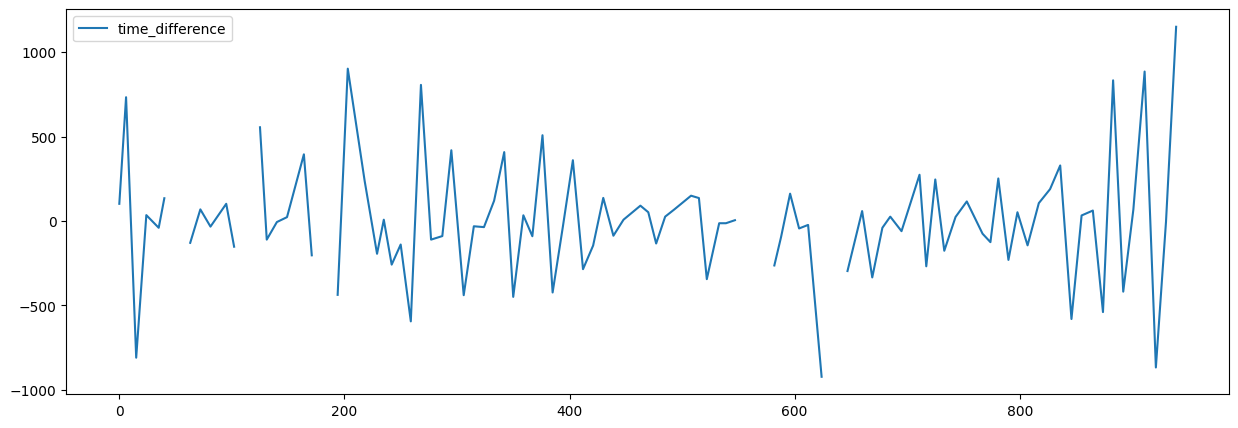

In [16]:
stop1_cleaned.plot(figsize = (15,5))